# 8. 자연어 처리 시작하기

## 꼬꼬마

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~')

['한국어 분석을 시작합니다', '재미있어요~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~', 'SO')]

## 한나눔

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~']

In [7]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~', 'S')]

## 트위터

In [8]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [9]:
t.nouns('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '시작']

In [10]:
t.morphs('한국어 분석을 시작합니다 재미있어요~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~']

In [11]:
t.pos('한국어 분석을 시작합니다 재미있어요~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~', 'Punctuation')]

## word cloud

In [12]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [13]:
text = open('data/09. alice.txt').read()
alice_mask = np.array(Image.open('data/09. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [15]:
import matplotlib.pyplot as plt
import platform

path = 'c:\Windows\Fonts\malgun.ttf'
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

%matplotlib inline

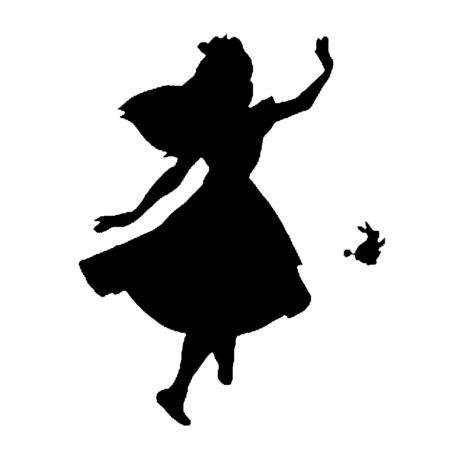

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

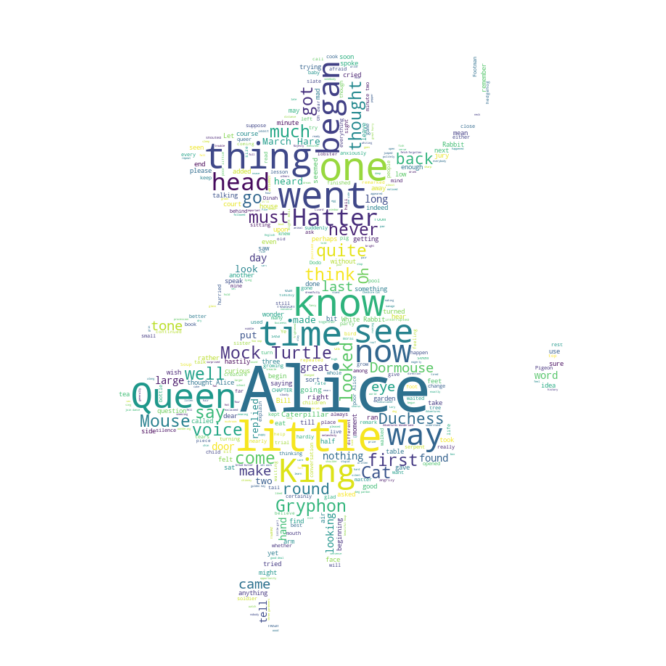

In [20]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
text = open('data/09. a_new_hope.txt').read()
text = text.replace('HAN', 'han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('data/09. stormtrooper_mask.png'))

In [22]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [23]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10).generate(text)
default_colors = wc.to_array()

In [24]:
import random
def grey_color_func (word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

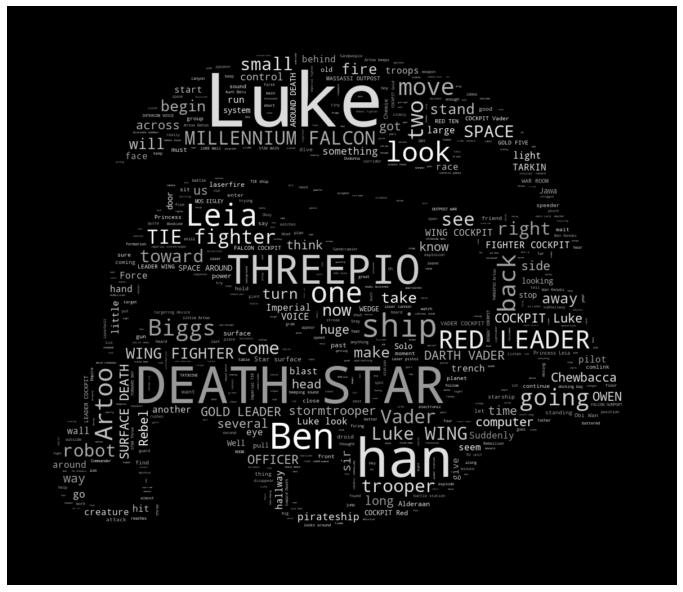

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func), interpolation='bilinear')
plt.axis('off')
plt.show()

## 육아휴직 관련 법안에 대한 분석

In [26]:
import nltk

In [27]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [28]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [29]:
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [30]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [31]:
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

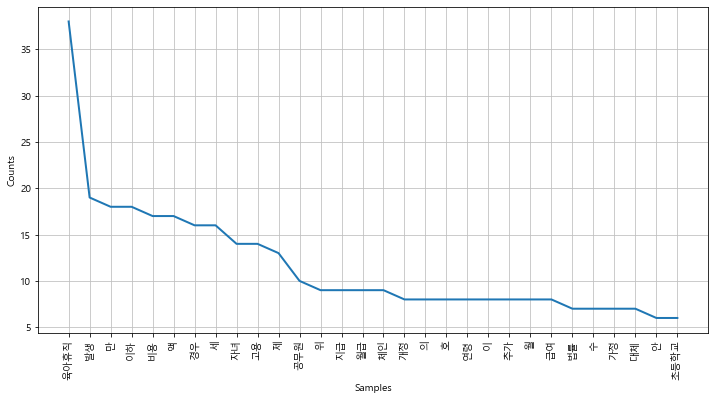

In [34]:
plt.figure(figsize=(12,6))
ko.plot(30)
plt.show()

In [35]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', 'x', '의', '자', '에', '안', '번', '호', '을', '이', '다', '만', '로', '가', '를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

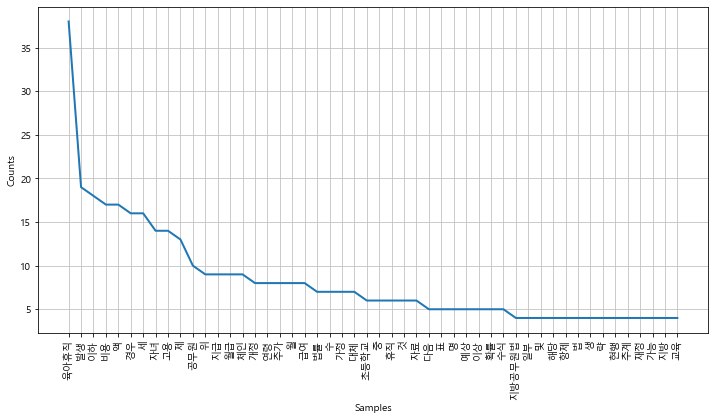

In [37]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12, 6))
ko.plot(50)
plt.show()

In [39]:
ko.count('초등학교')

6

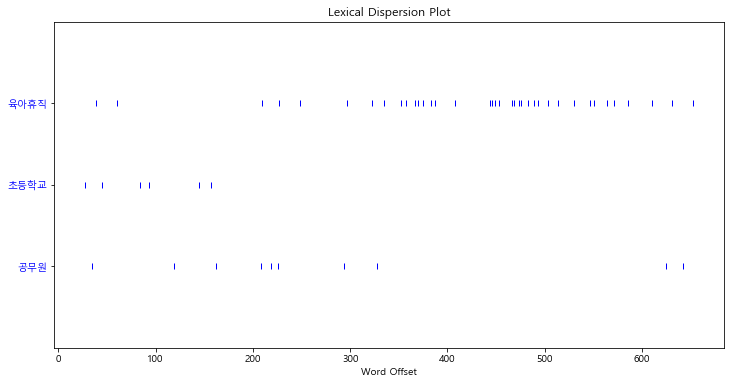

In [40]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [47]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [49]:
nltk.download('stopwords')
ko.collocations()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yhoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


ValueError: too many values to unpack (expected 2)

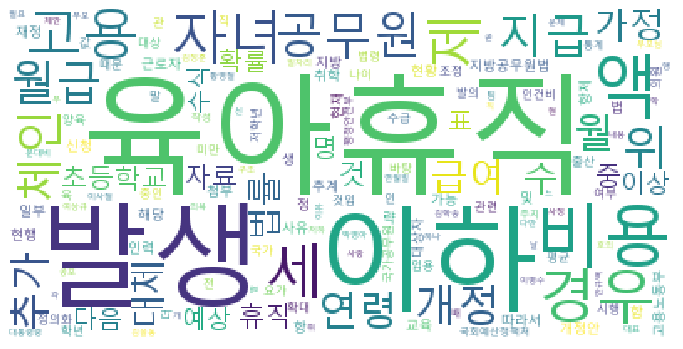

In [50]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

 ## Naive Bayes Classifier

In [51]:
from nltk.tokenize import word_tokenize
import nltk

train = [('i like you', 'pos'),
        ('i hate you', 'neg'),
        ('you like me', 'neg'),
        ('i like her', 'pos')]

In [53]:
nltk.download('punkt')
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yhoon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


{'hate', 'her', 'i', 'like', 'me', 'you'}

In [55]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'like': True,
   'her': False,
   'you': True,
   'hate': False,
   'me': False,
   'i': True},
  'pos'),
 ({'like': False,
   'her': False,
   'you': True,
   'hate': True,
   'me': False,
   'i': True},
  'neg'),
 ({'like': True,
   'her': False,
   'you': True,
   'hate': False,
   'me': True,
   'i': False},
  'neg'),
 ({'like': True,
   'her': True,
   'you': False,
   'hate': False,
   'me': False,
   'i': True},
  'pos')]

In [56]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                     you = True              neg : pos    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                      me = False             pos : neg    =      1.7 : 1.0


In [57]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower() : (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'like': True,
 'her': False,
 'you': False,
 'hate': False,
 'me': False,
 'i': True}

In [58]:
classifier.classify(test_sent_features)

'pos'

In [59]:
from konlpy.tag import Twitter
pos_tagger = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [60]:
train  = [('메리가 좋아', 'pos'),
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [61]:
all_words = set(word.lower() for sentence in train for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [62]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1]) for x in train]
t

[({'메리는': False,
   '난': False,
   '지루해': False,
   '고양이도': False,
   '메리랑': False,
   '수업이': False,
   '고양이야': False,
   '좋아': True,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '이쁜': False},
  'pos'),
 ({'메리는': False,
   '난': False,
   '지루해': False,
   '고양이도': True,
   '메리랑': False,
   '수업이': False,
   '고양이야': False,
   '좋아': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '이쁜': False},
  'pos'),
 ({'메리는': False,
   '난': True,
   '지루해': True,
   '고양이도': False,
   '메리랑': False,
   '수업이': True,
   '고양이야': False,
   '좋아': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '이쁜': False},
  'neg'),
 ({'메리는': True,
   '난': False,
   '지루해': False,
   '고양이도': False,
   '메리랑': False,
   '수업이': False,
   '고양이야': True,
   '좋아': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '이쁜': True},
  'pos'),
 ({'메리는': False,
   '난': True,
   '지루해': False,
   '고양이도': False,
   '메리랑': True,
   '수업이': False,
   '고양이야': False,
   '좋아': False,
   '놀거야': True,
   '마치고':

In [63]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0


In [64]:
test_sentence = '난 수업이 끝나면 메리랑 놀거야'

In [66]:
test_sent_features = {word.lower(): (word in word_tokenize(test_sentence.lower())) for word in all_words}
test_sent_features

{'메리는': False,
 '난': True,
 '지루해': False,
 '고양이도': False,
 '메리랑': True,
 '수업이': True,
 '고양이야': False,
 '좋아': False,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '이쁜': False}

In [67]:
classifier.classify(test_sent_features)

'neg'

In [68]:
def tokenize(doc):
    return['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [69]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [70]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [71]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [72]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'메리/Noun': True,
   '가/Josa': True,
   '좋다/Adjective': True,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': True,
   '고양이/Noun': True,
   '도/Josa': True,
   '난/Noun': False,
   '수업/Noun': False,
   '이/Josa': False,
   '지루하다/Adjective': False,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Josa': False,
   '랑/Josa': False,
   '놀다/Verb': False},
  'pos'),
 ({'메리/Noun': False,
   '가/Josa': False,
   '좋다/Adjective': False,
   '고양이/Noun': False,
   '도/Josa': False,
   '난/Noun': True,
   '수업/Noun': True,
   '이/Josa': True,
   '지루하다/Adjective': True,
   '는/Josa': False,
   '이쁘다/Adjective': False,
   '야/Josa': False,
   '마치/Noun': False,
   '고/Jo

In [73]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [81]:
test_sentence = '난 수업이 끝나면 메리랑 놀거야'
test_docs = pos_tagger.pos(test_sentence)
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('끝나면', 'Verb'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [83]:
test_sent_features = {word: ('{}/{}'.format(word[0], word[1]) in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): True,
 ('수업', 'Noun'): True,
 ('이', 'Josa'): True,
 ('끝나면', 'Verb'): False,
 ('메리', 'Noun'): True,
 ('랑', 'Josa'): True,
 ('놀거야', 'Verb'): False}

In [84]:
classifier.classify(test_sent_features)

'pos'

## 문장의 유사도 측정하기

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)

In [102]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떡하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [103]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '여행을',
 '이상해요',
 '있어요']

In [122]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [124]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떡하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [125]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떡하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [128]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [129]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [130]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [131]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [132]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [133]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())
    

In [136]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s"%(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=3.00   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [137]:
print("Best post is %i, dist = %.2f"%(best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [138]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('--------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
--------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [139]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [140]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s"%(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.28   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [141]:
print("Best post is %i, dist = %.2f"%(best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [142]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D)) / (len([doc for doc in D if t in doc])))
    return tf, idf

In [143]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a, abb, abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [145]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    contents_for_vectorize.append(sentence)

X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 20)

In [146]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떡하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [150]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
    
    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [151]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [152]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s"%(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f"%(best_i, best_dist))
print('-->', new_post)
print('--->', contents[best_i])

== Post 0 with dist=1.34   : 메리랑 놀러가고 싶지만 바쁜데 어떡하죠?
== Post 1 with dist=0.41   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.33   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 1, dist = 0.41
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


## 여자친구 선물 고르기

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [12]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&query={key_word}&kin_start={num}'

response = urlopen(html.format(key_word=urllib.parse.quote('여자+친구+선물'), num=1))

soup = BeautifulSoup(response, 'html.parser')

tmp = soup.find_all('dd', 'answer')

In [15]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text[3:])

tmp_list

[' 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨... 같아서 여자친구 선물 추천으로 딱인 것 같아요~~ 저도... 역시 여자친구 선물 추천이라고 하면 꽃!! 하지만 진짜... ',
 ' 안녕하세요, 질문자님께서 여자친구 선물을 하시려나 봅니다. 어떠한 여자친구 선물을 화이트데이 기념으로... 걸로 여자친구 선물을 해주시면 좋을 거 같으니 참고하시길... ',
 ' 그가격대는 화이트골드 14k 제품 선물해주시면 좋습니다. 실버라는 의미가 화이트색상말씀하신거같네요 ',
 ' 100일 여자친구 선물로 무드미 달 무드등은 어떠세요? 학생이 구매하기에도 부담스럽지 않은 가격대의 제품이고 남녀노소 누구나 좋아할 리얼한 보름달 디자인에... ',
 ' 여자친구 선물로 옷이나 신발 이런 것보다 화장품 줬을 때가 제일 반응 좋았네요... 아무리 생각해 봐도 이런 기초화장품 세트가 여자친구 선물로 제일 좋은 것 같아요! ',
 ' 사실 이건 누구나 한번쯤 고민해 봤을 것 같은데요. 그래도 마음을 전할 수 있는 계기니까 좋은거 같아요. 연인간의 선물은 사실 실용적인 것 보다는 의미 있고 상징적인... ',
 ' 여자친구선물 고민하시는 거면 좋은거 알려드려야겠네요... 저도 예전에 여자친구선물로 줬던 건데 너무... 또 여자친구선물로 드리는 거다 보니까 부작용이나 효과 이런 게... ',
 ' ㅎㅎ 10대 여자친구 선물로는 뭐가 좋을까라니.. ㅎㅎ 저는10대 여자친구 선물로 라노아 퓨어플라워 스킨, 로션... 10대 여자친구 선물로 주기에 여러모로 너무 좋은거... ',
 ' 질문자님께서 여자친구선물 관련하여 찾아보시는... 해줬던 여자친구선물을 알려드리려 합니다. 평소... 걸로 여자친구선물을 해주고 싶어서 알아보다 보니... ',
 ' 토닥토닥워터 너의이름은장미를 추천해요 장미와 건조레몬, 딸기 등이 블랜딩 되어 있어 상큼하고 맛있게 먹을수 있어요 간편하게 보틀에 우려 마시면 되고 낱봉으로 되어... ']

In [16]:
from tqdm import tqdm_notebook

present_text = []

for n in tqdm_notebook(range(1, 10000, 10)):
    response = urlopen(html.format(key_word=urllib.parse.quote('여자+친구+선물'), num=n))

    soup = BeautifulSoup(response, 'html.parser')

    tmp = soup.find_all('dd', 'answer')
    
    for line in tmp:
        present_text.append(line.text[3:])
    
    time.sleep(0.5)

In [17]:
present_text

[' 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨... 같아서 여자친구 선물 추천으로 딱인 것 같아요~~ 저도... 역시 여자친구 선물 추천이라고 하면 꽃!! 하지만 진짜... ',
 ' 안녕하세요, 질문자님께서 여자친구 선물을 하시려나 봅니다. 어떠한 여자친구 선물을 화이트데이 기념으로... 걸로 여자친구 선물을 해주시면 좋을 거 같으니 참고하시길... ',
 ' 그가격대는 화이트골드 14k 제품 선물해주시면 좋습니다. 실버라는 의미가 화이트색상말씀하신거같네요 ',
 ' 100일 여자친구 선물로 무드미 달 무드등은 어떠세요? 학생이 구매하기에도 부담스럽지 않은 가격대의 제품이고 남녀노소 누구나 좋아할 리얼한 보름달 디자인에... ',
 ' 여자친구 선물로 옷이나 신발 이런 것보다 화장품 줬을 때가 제일 반응 좋았네요... 아무리 생각해 봐도 이런 기초화장품 세트가 여자친구 선물로 제일 좋은 것 같아요! ',
 ' 사실 이건 누구나 한번쯤 고민해 봤을 것 같은데요. 그래도 마음을 전할 수 있는 계기니까 좋은거 같아요. 연인간의 선물은 사실 실용적인 것 보다는 의미 있고 상징적인... ',
 ' 여자친구선물 고민하시는 거면 좋은거 알려드려야겠네요... 저도 예전에 여자친구선물로 줬던 건데 너무... 또 여자친구선물로 드리는 거다 보니까 부작용이나 효과 이런 게... ',
 ' ㅎㅎ 10대 여자친구 선물로는 뭐가 좋을까라니.. ㅎㅎ 저는10대 여자친구 선물로 라노아 퓨어플라워 스킨, 로션... 10대 여자친구 선물로 주기에 여러모로 너무 좋은거... ',
 ' 질문자님께서 여자친구선물 관련하여 찾아보시는... 해줬던 여자친구선물을 알려드리려 합니다. 평소... 걸로 여자친구선물을 해주고 싶어서 알아보다 보니... ',
 ' 토닥토닥워터 너의이름은장미를 추천해요 장미와 건조레몬, 딸기 등이 블랜딩 되어 있어 상큼하고 맛있게 먹을수 있어요 간편하게 보틀에 우려 마시면 되고 낱봉으로 되어... ',
 ' 20대 여자친구 선물로 줄 만한 상품이라면 크림 같은...

In [18]:
import nltk
from konlpy.tag import Twitter; t=Twitter()

text=''

for each in present_text[:10000]:
    text = text + each + '\n'

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [26]:
tokens_ko = t.nouns(text)
tokens_ko

['저',
 '여자친구',
 '선물',
 '추천',
 '천연',
 '성분',
 '스킨',
 '여자친구',
 '선물',
 '추천',
 '것',
 '저',
 '역시',
 '여자친구',
 '선물',
 '추천',
 '꽃',
 '진짜',
 '질문',
 '자',
 '여자친구',
 '선물',
 '여자친구',
 '선물',
 '화이트데이',
 '기념',
 '걸',
 '여자친구',
 '선물',
 '해주시',
 '거',
 '참고',
 '가격',
 '화이트골드',
 '제품',
 '선물',
 '실버',
 '의미',
 '화이트',
 '색상',
 '말씀',
 '여자친구',
 '선물',
 '무드미',
 '달',
 '무드등',
 '학생',
 '구매',
 '부담',
 '가격',
 '대의',
 '제품',
 '남녀',
 '노소',
 '누구',
 '리얼',
 '보름달',
 '디자인',
 '여자친구',
 '선물',
 '옷',
 '신발',
 '것',
 '화장품',
 '때',
 '제일',
 '반응',
 '생각',
 '기초',
 '화장품',
 '세트',
 '여자친구',
 '선물',
 '제일',
 '것',
 '사실',
 '이건',
 '누구',
 '한번',
 '고민',
 '것',
 '마음',
 '전',
 '수',
 '계기',
 '거',
 '인간',
 '선물',
 '사실',
 '실용',
 '것',
 '의미',
 '상징',
 '여자친구',
 '선물',
 '고민',
 '거',
 '거',
 '저',
 '예전',
 '여자친구',
 '선물',
 '또',
 '여자친구',
 '선물',
 '거',
 '보',
 '부작용',
 '효과',
 '게',
 '여자친구',
 '선물',
 '뭐',
 '저',
 '여자친구',
 '선물',
 '노아',
 '퓨어',
 '플라워',
 '스킨',
 '로션',
 '여자친구',
 '선물',
 '주기',
 '모로',
 '거',
 '질문',
 '자',
 '여자친구',
 '선물',
 '관련',
 '여자친구',
 '선물',
 '평소',
 '걸',
 '여자친구',
 '선물',
 '토닥토닥',
 '워터',
 '

In [27]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

134556
2003


In [28]:
ko = nltk.Text(tokens_ko, name='여자친구 선물')
ko.vocab().most_common(100)

[('선물', 11073),
 ('목걸이', 4171),
 ('여자친구', 3388),
 ('분', 2741),
 ('직접', 2726),
 ('여자', 1891),
 ('용', 1870),
 ('더', 1847),
 ('일단', 1822),
 ('아이템', 1799),
 ('뭐', 1798),
 ('티', 1789),
 ('취업', 1785),
 ('가습기', 1784),
 ('추천', 1457),
 ('저', 1044),
 ('요', 1035),
 ('이벤트', 980),
 ('의미', 974),
 ('가격', 969),
 ('하트', 968),
 ('고민', 961),
 ('다이아', 960),
 ('여친', 959),
 ('항상', 955),
 ('티니', 955),
 ('감동', 953),
 ('하나', 941),
 ('목', 939),
 ('라면', 934),
 ('팔찌', 928),
 ('이름', 927),
 ('사진', 926),
 ('자신', 922),
 ('걸', 917),
 ('속', 916),
 ('남자', 915),
 ('동화책', 915),
 ('세상', 915),
 ('가방', 914),
 ('주인공', 914),
 ('얘기', 914),
 ('정성', 913),
 ('실버', 912),
 ('친구', 911),
 ('세트', 909),
 ('건조', 909),
 ('보고', 909),
 ('도', 909),
 ('주얼리', 909),
 ('꼭', 908),
 ('구매', 906),
 ('인형', 906),
 ('메이커', 905),
 ('여름', 903),
 ('엮어', 902),
 ('무드등', 901),
 ('이건', 901),
 ('상품', 901),
 ('달', 899),
 ('개', 899),
 ('자주', 899),
 ('키', 899),
 ('강추', 899),
 ('처음', 898),
 ('물건', 898),
 ('사주면', 898),
 ('축하', 898),
 ('또', 897),
 ('여러가지', 897),
 ('

In [29]:
stop_word = ['선물', '여자친구', '분', '여자', '용', '더', '일단', '아이템','뭐','취업','추천','저','요','가격','고민','여친','항상','하나','목','라면','걸','속','친구','보고','도','꼭','구매','여름','엮어','이건','상품','자주','강추','처음','물건','사주면','축하','또','여러가지','그것','남녀','주기','만큼','단','일도','안내','사무실','임','출근','대학입학','고','레포트']

In [31]:
tokens_ko = [each for each in tokens_ko if each not in stop_word]

ko = nltk.Text(tokens_ko, name = '여자 친구 선물')
ko.vocab().most_common(100)

[('목걸이', 4171),
 ('가습기', 1784),
 ('이벤트', 980),
 ('하트', 968),
 ('다이아', 960),
 ('팔찌', 928),
 ('사진', 926),
 ('남자', 915),
 ('동화책', 915),
 ('세상', 915),
 ('가방', 914),
 ('주인공', 914),
 ('얘기', 914),
 ('정성', 913),
 ('실버', 912),
 ('세트', 909),
 ('건조', 909),
 ('주얼리', 909),
 ('인형', 906),
 ('메이커', 905),
 ('무드등', 901),
 ('달', 899),
 ('개', 899),
 ('키', 899),
 ('공부', 896),
 ('유니크', 896),
 ('이니셜', 895),
 ('폰', 895),
 ('상자', 895),
 ('케잌', 894),
 ('커플티', 894),
 ('손수', 893),
 ('키링', 893),
 ('책상', 893),
 ('수입', 893),
 ('과자', 893),
 ('쿠우', 892),
 ('품', 892),
 ('필터', 892),
 ('스마트홈패드', 892),
 ('가득', 892),
 ('간다', 892),
 ('페이스북', 892),
 ('페이지', 892),
 ('댓글', 892),
 ('때', 750),
 ('기분', 661),
 ('링', 252),
 ('건', 248),
 ('쥬얼리', 247),
 ('할인', 244),
 ('안쪽', 240),
 ('에버', 240),
 ('것', 149),
 ('제', 131),
 ('향수', 105),
 ('화장품', 94),
 ('참고', 79),
 ('거', 72),
 ('생각', 72),
 ('요즘', 70),
 ('제품', 66),
 ('인기', 64),
 ('귀걸이', 63),
 ('중', 63),
 ('생일', 62),
 ('브랜드', 59),
 ('커플', 57),
 ('등', 53),
 ('수', 49),
 ('하루', 48),
 ('꽃', 47)

In [32]:
stop_word += ['가득','간다','페이지','댓글','때','건','할인','안쪽','것','제','참고','거','요즘','제품','인기','중','수','배송','좀','전부','한번','품절','부담','정말','때문','위','정도','질문','경우','날']

In [33]:
tokens_ko = [each for each in tokens_ko if each not in stop_word]

ko = nltk.Text(tokens_ko, name = '여자 친구 선물')
ko.vocab().most_common(100)

[('목걸이', 4171),
 ('가습기', 1784),
 ('이벤트', 980),
 ('하트', 968),
 ('다이아', 960),
 ('팔찌', 928),
 ('사진', 926),
 ('남자', 915),
 ('동화책', 915),
 ('세상', 915),
 ('가방', 914),
 ('주인공', 914),
 ('얘기', 914),
 ('정성', 913),
 ('실버', 912),
 ('세트', 909),
 ('건조', 909),
 ('주얼리', 909),
 ('인형', 906),
 ('메이커', 905),
 ('무드등', 901),
 ('달', 899),
 ('개', 899),
 ('키', 899),
 ('공부', 896),
 ('유니크', 896),
 ('이니셜', 895),
 ('폰', 895),
 ('상자', 895),
 ('케잌', 894),
 ('커플티', 894),
 ('손수', 893),
 ('키링', 893),
 ('책상', 893),
 ('수입', 893),
 ('과자', 893),
 ('쿠우', 892),
 ('품', 892),
 ('필터', 892),
 ('스마트홈패드', 892),
 ('페이스북', 892),
 ('기분', 661),
 ('링', 252),
 ('쥬얼리', 247),
 ('에버', 240),
 ('향수', 105),
 ('화장품', 94),
 ('생각', 72),
 ('귀걸이', 63),
 ('생일', 62),
 ('브랜드', 59),
 ('커플', 57),
 ('등', 53),
 ('하루', 48),
 ('꽃', 47),
 ('지갑', 47),
 ('영상', 44),
 ('계절', 44),
 ('마음', 37),
 ('사람', 36),
 ('장미', 35),
 ('여성', 35),
 ('가지', 35),
 ('가죽', 35),
 ('악세사리', 34),
 ('향', 31),
 ('편지', 30),
 ('반지', 28),
 ('시계', 27),
 ('레몬', 26),
 ('취향', 26),
 ('가장', 26),
 

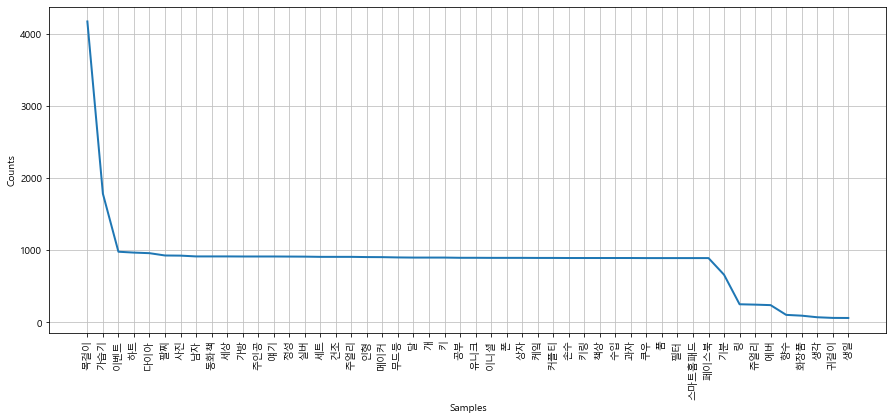

In [34]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [35]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [36]:
data = ko.vocab().most_common(300)
data

[('목걸이', 4171),
 ('가습기', 1784),
 ('이벤트', 980),
 ('하트', 968),
 ('다이아', 960),
 ('팔찌', 928),
 ('사진', 926),
 ('남자', 915),
 ('동화책', 915),
 ('세상', 915),
 ('가방', 914),
 ('주인공', 914),
 ('얘기', 914),
 ('정성', 913),
 ('실버', 912),
 ('세트', 909),
 ('건조', 909),
 ('주얼리', 909),
 ('인형', 906),
 ('메이커', 905),
 ('무드등', 901),
 ('달', 899),
 ('개', 899),
 ('키', 899),
 ('공부', 896),
 ('유니크', 896),
 ('이니셜', 895),
 ('폰', 895),
 ('상자', 895),
 ('케잌', 894),
 ('커플티', 894),
 ('손수', 893),
 ('키링', 893),
 ('책상', 893),
 ('수입', 893),
 ('과자', 893),
 ('쿠우', 892),
 ('품', 892),
 ('필터', 892),
 ('스마트홈패드', 892),
 ('페이스북', 892),
 ('기분', 661),
 ('링', 252),
 ('쥬얼리', 247),
 ('에버', 240),
 ('향수', 105),
 ('화장품', 94),
 ('생각', 72),
 ('귀걸이', 63),
 ('생일', 62),
 ('브랜드', 59),
 ('커플', 57),
 ('등', 53),
 ('하루', 48),
 ('꽃', 47),
 ('지갑', 47),
 ('영상', 44),
 ('계절', 44),
 ('마음', 37),
 ('사람', 36),
 ('장미', 35),
 ('여성', 35),
 ('가지', 35),
 ('가죽', 35),
 ('악세사리', 34),
 ('향', 31),
 ('편지', 30),
 ('반지', 28),
 ('시계', 27),
 ('레몬', 26),
 ('취향', 26),
 ('가장', 26),
 

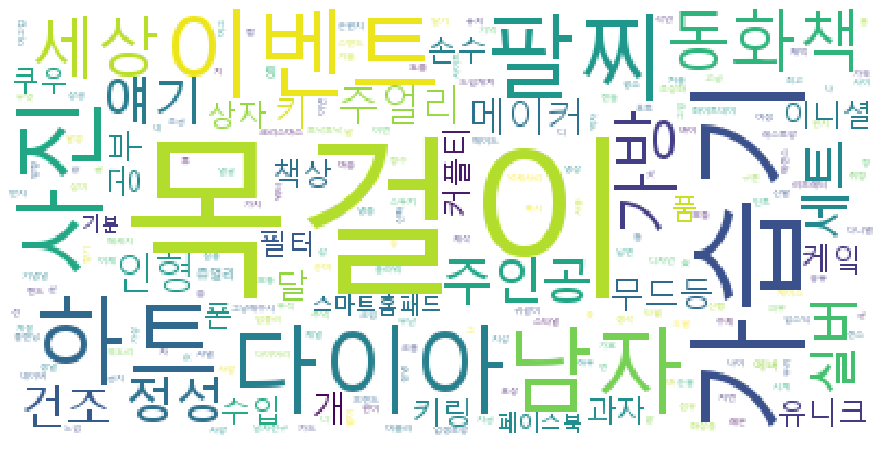

In [37]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.5,
                     background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
mask = np.array(Image.open('data/09. heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

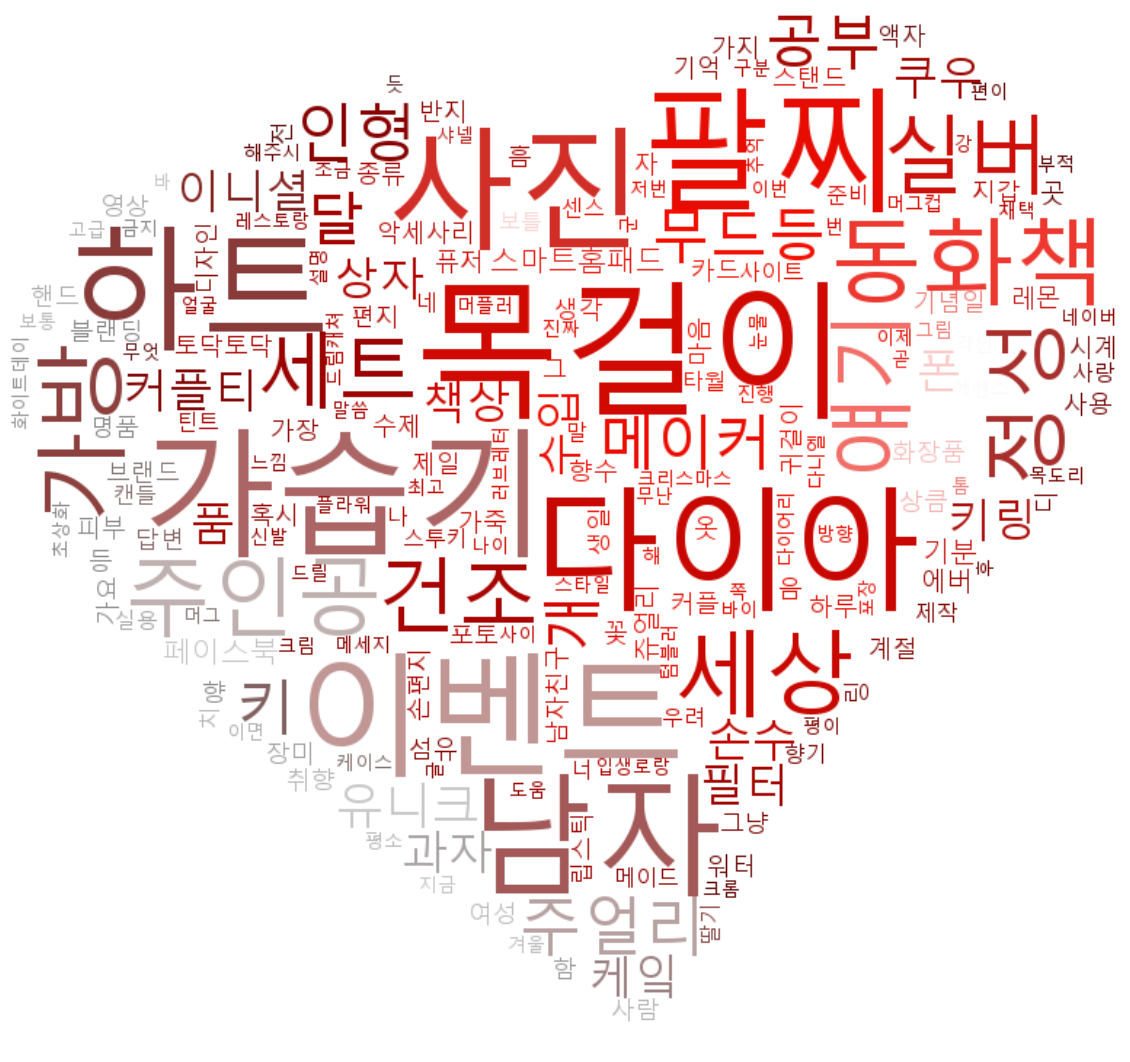

In [50]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.1, mask=mask,
                     background_color='white', min_font_size=1, max_font_size=100).generate_from_frequencies(dict(data))
default_colors = wordcloud.to_array()

plt.figure(figsize=(20,20))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
import gensim
from gensim.models import word2vec

In [52]:
twitter = Twitter()
results = []
lines = present_text

for line in tqdm_notebook(lines):
    malist = twitter.pos(line, norm=True, stem=True)
    r=[]
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    
    r1=(" ".join(r)).strip()
    results.append(r1)
        

In [55]:
data_file = 'pres_girl.data'
with open(data_file,'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

model.save('pres_girl.model')

In [58]:
model = word2vec.Word2Vec.load("pres_girl.model")
model.most_similar(positive=['선물'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('취업', 0.4406392574310303),
 ('분', 0.4327045977115631),
 ('하다', 0.41411495208740234),
 ('단', 0.41228336095809937),
 ('만큼', 0.3950200080871582),
 ('일단', 0.37726959586143494),
 ('얘기', 0.36312219500541687),
 ('축하', 0.3590239882469177),
 ('너무나도', 0.3378616273403168),
 ('개', 0.33428090810775757)]

In [59]:
model.most_similar(positive=['여자친구'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('단', 0.5813608765602112),
 ('주얼리', 0.5771323442459106),
 ('너무나도', 0.564603328704834),
 ('만큼', 0.5584264993667603),
 ('축하', 0.5497739911079407),
 ('의미', 0.5434655547142029),
 ('세상', 0.5395381450653076),
 ('실버', 0.5261118412017822),
 ('하나', 0.5180044174194336),
 ('고민', 0.5145158171653748)]

In [60]:
model.most_similar(positive=['스와로브스키', '목걸이'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('칸나', 0.7449496984481812),
 ('에스티', 0.728020191192627),
 ('스톤헨지', 0.712440013885498),
 ('금', 0.7031964063644409),
 ('마지막', 0.6858840584754944),
 ('구두', 0.6818147301673889),
 ('스톤', 0.6805838942527771),
 ('부터', 0.6726219654083252),
 ('착용', 0.6702737808227539),
 ('편', 0.6664198040962219)]

In [61]:
 model.most_similar(positive=['스와로브스키'], negative=['여자친구'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('스톤헨지', 0.6796821355819702),
 ('심플', 0.6594703197479248),
 ('깔끔하다', 0.6528105139732361),
 ('컵', 0.645392656326294),
 ('에스티', 0.6160027980804443),
 ('정품', 0.6148009896278381),
 ('낫', 0.6105284094810486),
 ('립', 0.6072564721107483),
 ('4', 0.6065778732299805),
 ('봄', 0.6042033433914185)]